In [63]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def Verificar_entero(entrada):
    while True:
        dato_int = input(f'ingrese {entrada}')
        try:
            return int(dato_int)
        except:
            print(f'para {entrada} debe ingresar un numero entero.')
            continue
class archivo_mat:
    def __init__(self,ruta_archivo = "r01_edfm (1).mat"):
        self.__data = loadmat(ruta_archivo)['val']
        self.__shape = self.__data.shape
    
    def obten_data(self):
        return self.__data
    
    def obten_limites(self): 
        while True:
            #limite inferior
            Linf = Verificar_entero(f'el valor mínimo del rango en el/los arreglo/s que desea graficar (hay {self.__shape[1]} valores)')
            if Linf<0 or Linf>=self.__shape[1]:
                print('ingrese un valor que esté dentro del rango del arreglo... reintentando')
                continue
            #Limite superior
            Lsup = Verificar_entero(f'ingrese el valor máximo del rango en el/los arreglo/s que desea graficar (hay {self.__shape[1]} valores)')
            if Lsup<=0 or Lsup>self.__shape[1]:
                print('ingrese un valor que esté dentro del rango del arreglo... reintentando')
                continue
            if Lsup<=Linf:
                print('el maximo debe ser mayor al mínimo... reintentando')
                continue
            else:
                return (Linf,Lsup)
    def devoler_arreglo_s(self):
        dict_arreglos = {}
        linf,lsup = self.obten_limites()
        while True:
            sub_menu = Verificar_entero('la opción que desea(el número) => \n1.graficar un arreglo\n2.graficar varios arreglos\n3.graficar todos los arreglos\n4.volver al menu principal ')
            
            if sub_menu == 1: #un solo arreglo
                while True:
                    opc = Verificar_entero('cual de los 6 arreglos desea graficar: => \n1\n2\n3\n4\n5\n6')
                    if 1<= opc <= 6:
                        dict_arreglos[f'arreglo {opc}'] = self.__data[opc-1 , linf:lsup]
                        return linf, lsup, dict_arreglos
                    else:
                        print('ingrese un numero de arreglo valido(numero del 1 al 6)')
            
            elif sub_menu == 2:#varios arreglos
                while True:
                    num_arreglos = Verificar_entero('cuantos arreglos desea graficar (1 a 6)')
                    if 1<= num_arreglos <= 6:
                        break
                    else:
                        print('ingrese un valor entre 1 y 6')

                while True:
                    for i in range(num_arreglos):
                        opc = Verificar_entero('cual de los 6 arreglos desea graficar: => \n1\n2\n3\n4\n5\n6')
                        if 1<opc or opc>6:
                            print('ingrese un valor entre 1 y 6... reintentando')
                            continue
                        elif dict_arreglos[f'arreglo {opc-1}'] in self.__data[opc-1 , linf:lsup]:
                            print('este arreglo ya fue seleccionado... intentando de nuevo.')
                            continue
                        dict_arreglos[f'arreglo {opc-1}'] = self.__data[opc-1 , linf:lsup]
                    return linf, lsup, dict_arreglos
            
            elif sub_menu==3: #todos los arreglos
                for i in range(6):
                    dict_arreglos[f'arreglo {i+1}'] = self.__data[i , linf : lsup]

                return linf, lsup, dict_arreglos
            
            elif sub_menu==4:
                return None
            else:
                print('seleccione una opción válida')
                continue
    def graficar_mat(self):
        linf, lsup, dict_arreglos = self.devoler_arreglo_s()
        llaves_arreglos = list(dict_arreglos.keys())
        X = np.arange(lsup-linf)
        tamano_arreglos = len(llaves_arreglos)                         #Aun sin acabar
        plt.subplot(111)                                               # :')
        for i in llaves_arreglos:
            plt.plot(X , dict_arreglos[i]+20 , label=i)
        plt.legend()
        plt.ylabel('intensidad')
        plt.xlabel('tiempo')
        plt.title('señal fisiologica')

<function matplotlib.pyplot.show(close=None, block=None)>

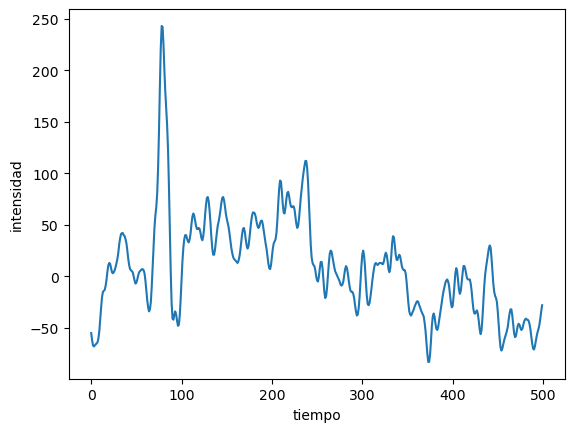

In [62]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datos_mat = loadmat("r01_edfm (1).mat")['val']
linf = 1500
lsup = 2000
x = np.arange(lsup-linf)
plt.subplot(111)
plt.plot(x,datos_mat[3,linf:lsup])
plt.xlabel('tiempo')
plt.ylabel('intensidad')
plt.show

In [3]:
def main():
    while True:
        menu = Verificar_entero('la opcion deseada=>\n1. graficar con el archivo MATLAB\n2.gestionar el archivo CSV\n3.salir')
        if menu ==1:
            pass
        elif menu==2:
            pass
        elif menu==3:
            print('cerrando sistema...')
            break
        else:
            print('seleccione una opción valida... reintentando')
            continue

In [52]:
#lo que sale de devolver todos los arreglos, probar con un rango corto para ver si funciona el orden
señal = archivo_mat()
linf,lsup,dict_arreglos = señal.devoler_arreglo_s()
llaves_arreglos = list(dict_arreglos.keys())
print(f'limite inferior: {linf}\nlimite superior: {lsup}\ndiccionario de arreglos:')
cont = 0
for i in llaves_arreglos:
    print(f'{llaves_arreglos[cont]} = {dict_arreglos[i]}')
    cont += 1
    continue
print('-'*30)
print(f'{llaves_arreglos}')

limite inferior: 0
limite superior: 10
diccionario de arreglos:
arreglo 1 = [287 266 247 237 235 236 236 236 237 243]
arreglo 2 = [ -89 -140 -188 -235 -280 -329 -382 -439 -494 -541]
arreglo 3 = [133 126 120 114 104  86  60  28  -4 -33]
arreglo 4 = [220 217 212 202 185 159 126  89  53  22]
arreglo 5 = [325 353 375 389 394 392 387 381 374 365]
arreglo 6 = [12331 12331 12331 12331 12331 12331 12331 12331 12331 12331]
------------------------------
['arreglo 1', 'arreglo 2', 'arreglo 3', 'arreglo 4', 'arreglo 5', 'arreglo 6']


<class 'int'>
